#PGWAVE studies
This looks at the PGWAVE-generated list of seeds for month10

In [9]:
%matplotlib inline
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly/month10'))

In [29]:
t = pd.read_csv('ft1_TBIN_9_map.txt', sep=' ', skiprows=0,skipinitialspace=True, index_col=0);
t.columns='x y l b pos_err snr k_signif counts sigc bkg sigbkg'.split()
t.index.name='id'
t['b l pos_err snr k_signif'.split()].describe()

,b,l,pos_err,snr,k_signif
count,923.000000,923.000000,923.000000,923.000000,923.000000
mean,-2.438380,176.990385,0.881108,20.031170,5.432728
std,47.221985,104.949168,0.082843,19.678959,7.999478
min,-88.625000,0.125000,0.231000,0.884000,2.437000
25%,-37.750000,85.625000,0.876000,8.576500,2.996000
50%,-0.125000,173.375000,0.906000,13.474000,3.364000
75%,33.000000,271.875000,0.924000,21.731000,4.634000
max,88.875000,359.875000,0.968000,122.339000,155.772000


In [56]:
from skymaps import SkyDir
sdirs = map( lambda l,b: SkyDir(l,b,SkyDir.GALACTIC), t.l ,t.b)
t['ra'] = [s.ra() for s in sdirs]
t['dec'] = [s.dec() for s in sdirs]
t.l[t.l>180]-=360

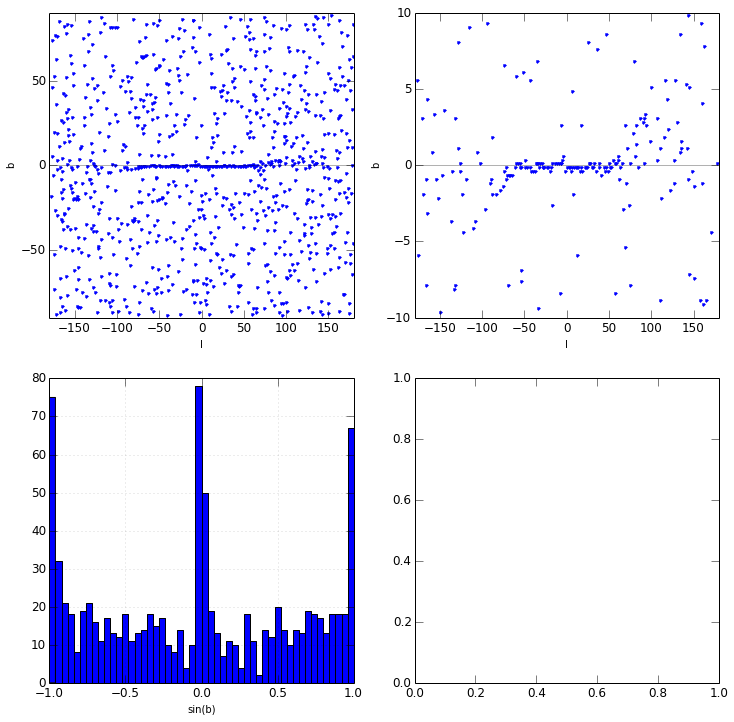

In [63]:
fig, axx = plt.subplots(2,2, figsize=(12,12))
ax = axx[0,0]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-90,90))
ax.axhline(0, color='k', alpha=0.3)
ax = axx[1,0]
sinb = np.sin(np.radians(t.b))
dom = np.linspace(-1,1,51)
ax.hist(list(sinb),dom);
plt.setp(ax, xlabel='sin(b)')
ax.grid(True, alpha=0.3)
ax = axx[0,1]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-10,10))
ax.axhline(0, color='k', alpha=0.3)


In [55]:
sinb

id
1    -0.999712
2    -0.999598
3    -0.999312
4    -0.999465
5    -0.999312
6    -0.999141
7    -0.999141
8    -0.999141
9    -0.998513
10   -0.998741
11   -0.998741
12   -0.998513
13   -0.998513
14   -0.998266
15   -0.997999
...
909    0.997086
910    0.997714
911    0.997409
912    0.997714
913    0.997999
914    0.997999
915    0.998266
916    0.998266
917    0.998741
918    0.999141
919    0.999141
920    0.999141
921    0.999312
922    0.999807
923    0.999712
Name: b, Length: 923, dtype: float64